# Linear model for the minimum-variance control


TODO : add instances as in ANR-REM_data/AnticipationPursuit/Data_analysis/Oldies/2016-09-08%20Harris%20%26%20Wolpert_Testing%20the%20linear%20model.ipynb

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [2]:
from HarrisWolpertandPursuit import MinimumVarianceControl, control_learning
from PlotFunctions import all_plots

In [3]:
debut = time.time()
m = MinimumVarianceControl(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 5000,record_each = 250, eta=5000, v=20.)
u, record, bangdata = control_learning(dt = 0.001, k = 0.0005, xT = np.array([10,0]), n_iter = 5000, record_each = 250, eta=5000, v=20.)
fin = time.time()

In [4]:
fin-debut

75.50318789482117

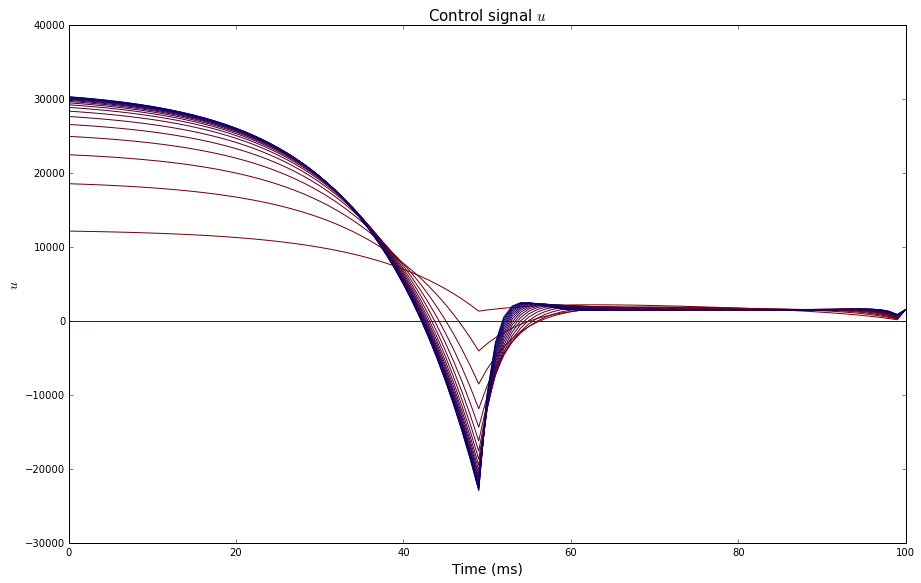

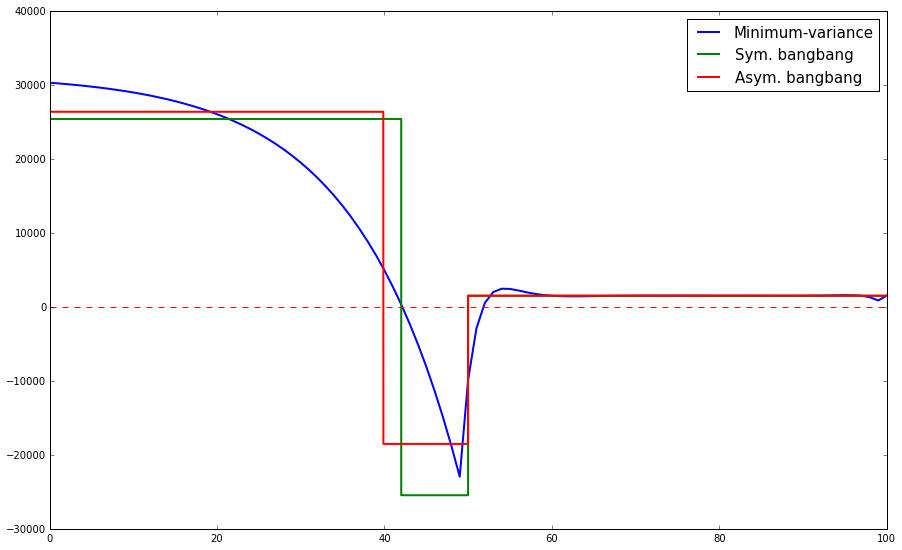

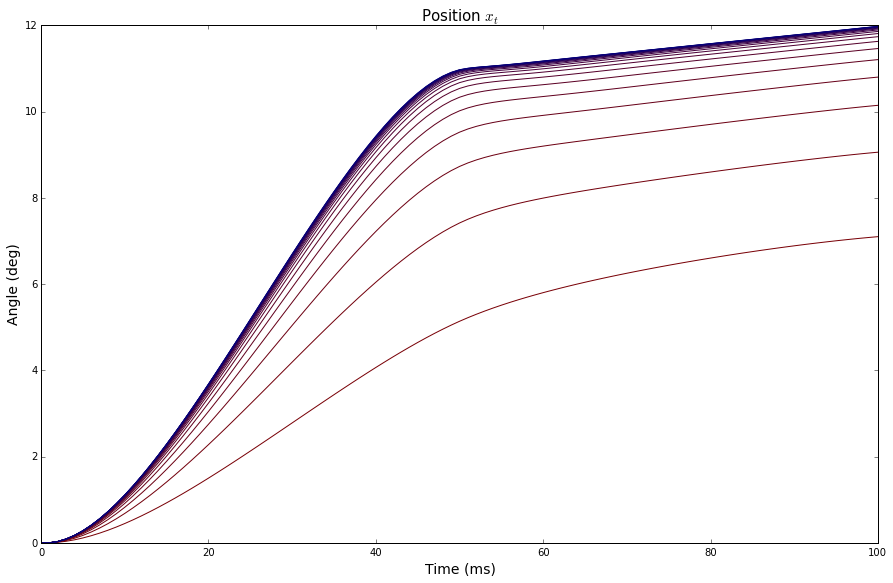

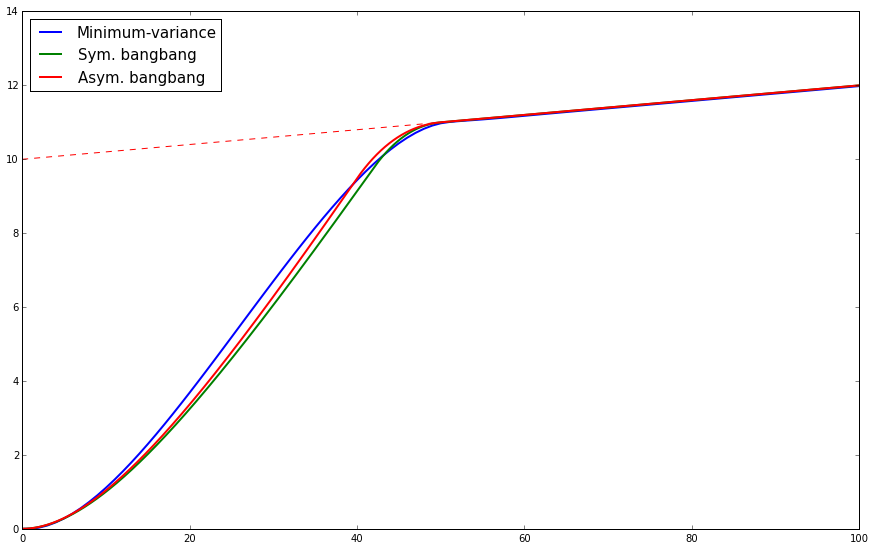

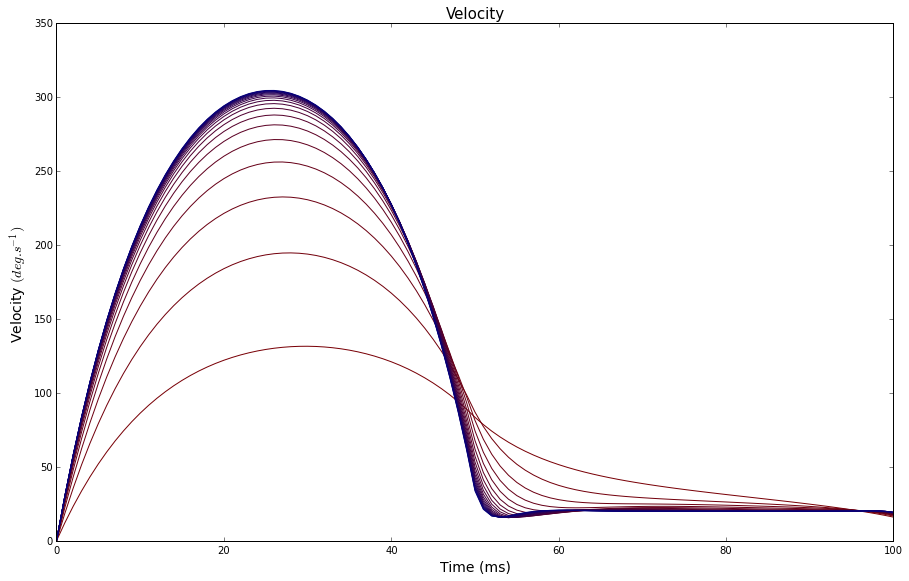

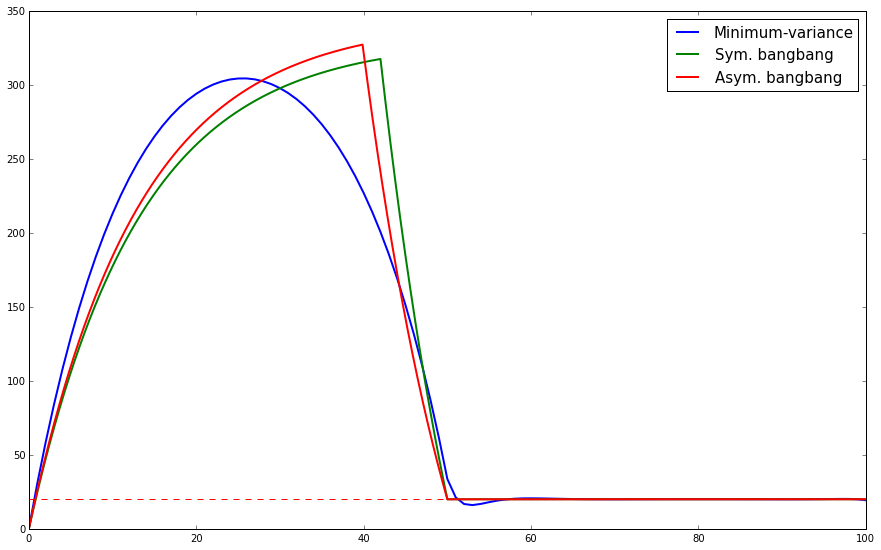

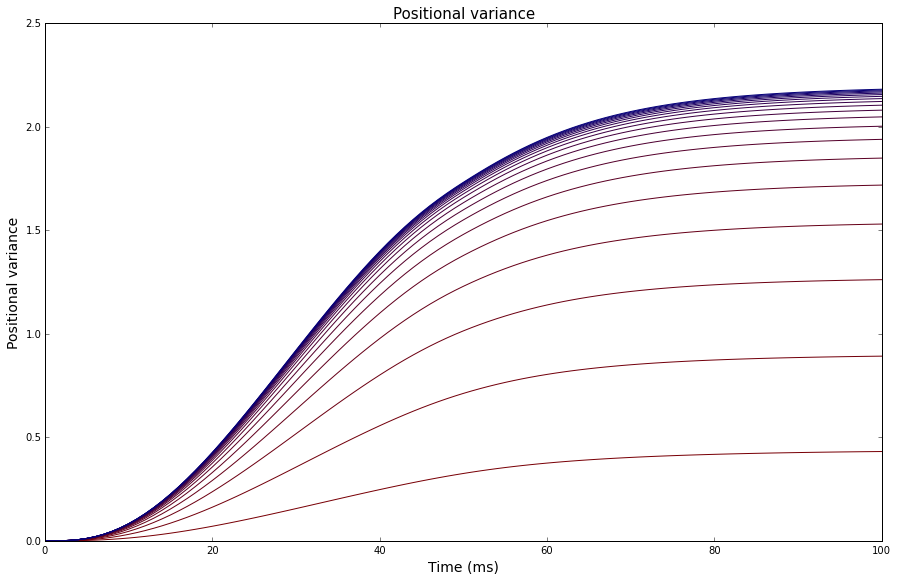

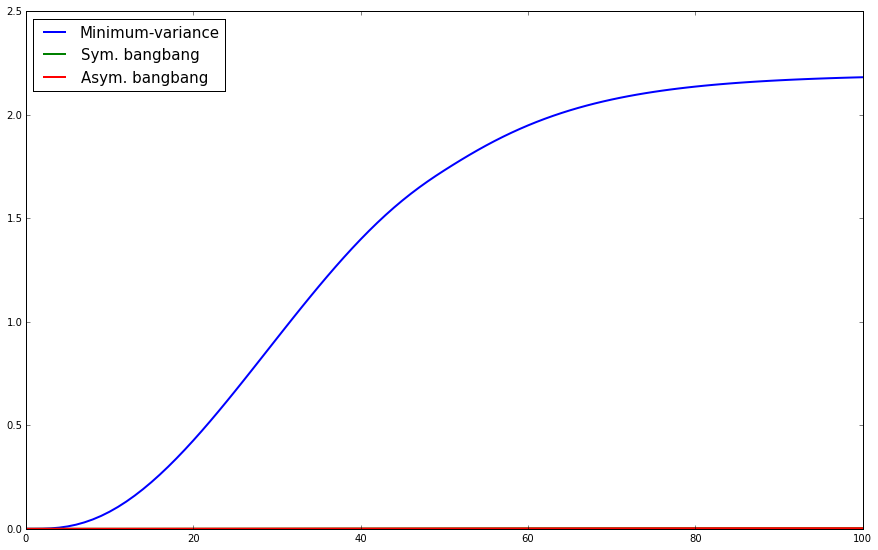

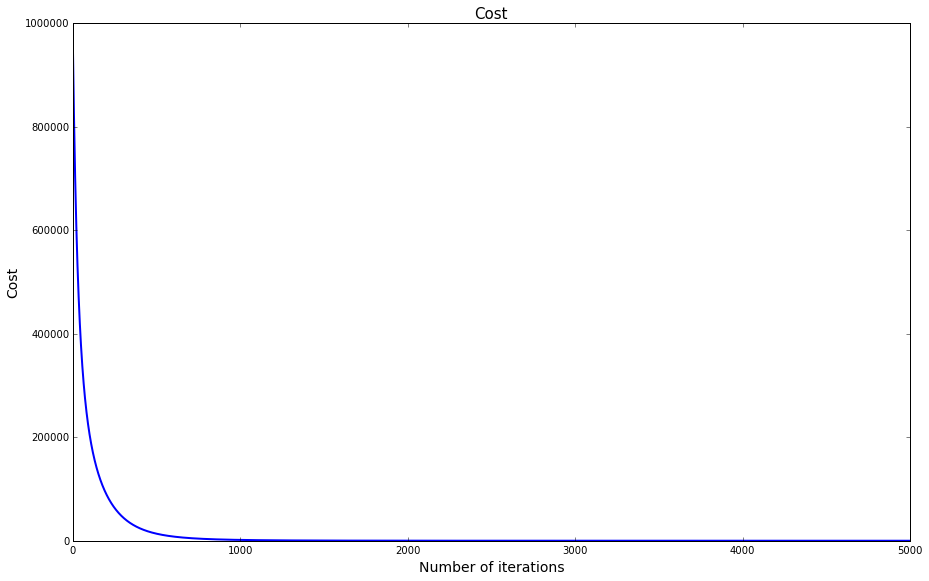

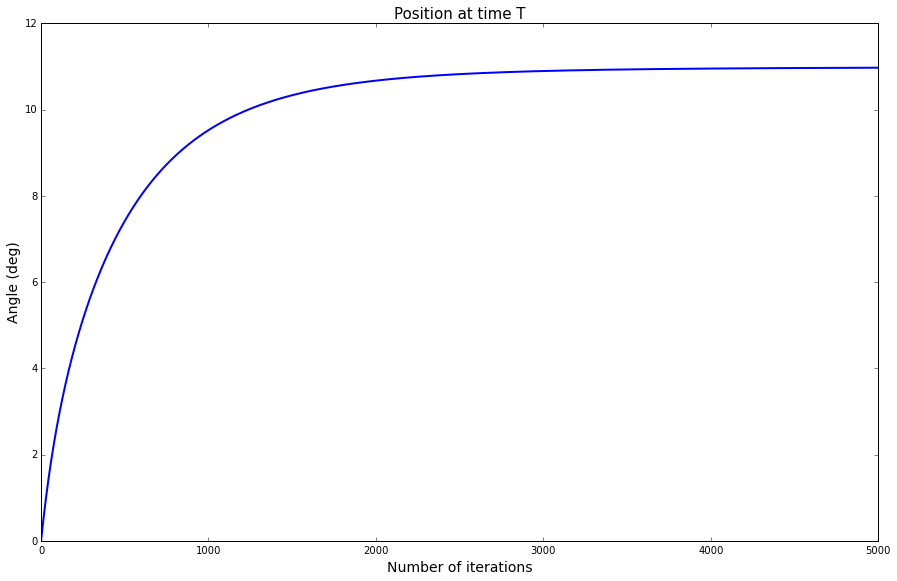

In [5]:
all_plots(record, bangdata, m.record_each, m.n_iter, m.t_T, m.t_R, m.dt, m.xT, m.v)